In [1]:
import pandas as pd
import numpy as np
import json
import nltk
import re
import csv
import matplotlib.pyplot as plt 
import seaborn as sns
from tqdm import tqdm
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix
import spacy
from sklearn.preprocessing import LabelEncoder

%matplotlib inline
pd.set_option('display.max_colwidth', 300)

In [2]:
df = pd.read_csv('BigData Boss DATASET.csv')
df.sample(5)

,Release Year,Title,Language,Director,Cast,Genre,Plot,Rating
182,2014,Sigaram Thodu,Tamil,Gaurav,"Vikram Prabhu, Monal Gajjar, Sathyaraj",action,"Muralipandian alias Murali (Vikram Prabhu) is the only son of Chellapandian (Chellapa) (Sathyaraj), a disabled policeman who is now working in the State Crime Records Bureau and expresses a desire to see his son in the police one day. However, Murali is against becoming a policeman due to an inc...",7.3
131,2014,Jilla,Tamil,R. T. Neason,"Mohanlal, Vijay, Kajal Aggarwal, Mahat, Niveda Thomas",action-masala,"Sakthi (Vijay) is the adopted son of a Madurai-based don Sivan (Mohanlal) and is also his right-hand man, bodyguard and driver. He hates the police due to a police officer killing his father, who was Sivan's driver, in his childhood. His hatred is such that he hates the khaki colour (which is wo...",6.0
122,2013,Ravana Desam,Tamil,Ajay Nuthakki,"Ajay Nuthakki, Jennifer, Naveen, Konda, Ramkiran",war drama,"The film begins in Sri Lanka during the civil war between the Sri Lanka Army and the Liberation Tigers of Tamil Eelam, who are fighting for a separate nation for Tamils. The movie tells the story of refugees who went missing while trying to escape the fighting by crossing the border with illegal...",5.5
411,2017,Sathya,Tamil,Pradeep Krishnamoorthy,"Sibi Sathyaraj, Remya Nambeesan, Varalaxmi Sarathkumar",crime thriller,"Sathya (Sibi Sathyaraj), Who is working in Sydney, Australia gets a voice call from Shweta(Remya Nambeesan), his ex-lover. They worked in the same Office and wanted to marry, but her father arranged an alliance with an entrepreneur named Gowtham. Sathya leaves for India with the pretense of atte...",5.5
219,2015,Tamiluku En Ondrai Aluthavum,Tamil,Ram Prakash Rayappa,"Attakathi Dinesh, Nakul, Bindu Madhavi, Aishwarya Dutta",social thriller,"A deadly bomb will be activated if a computer geek restores a part of Chennai city's mobile networks, which are down due to a solar flare. Four people are linked to each other on a deadly mission.\r\nMukil (Dinesh Ravi) falls in love with Simi (Bindu Madhavi), who is stuck in a pit hole with an ...",6.9


In [3]:
df.shape

(416, 8)

In [4]:
len(df.Genre.unique())

80

In [5]:
df["Genre"] = df["Genre"].apply(lambda x: x.split()[0])
df["Genre"] = df["Genre"].apply(lambda x: x.replace(r"/", ""))
df["Genre"] = df["Genre"].apply(lambda x: x.replace("—", " "))
df["Genre"] = df["Genre"].apply(lambda x: x.replace("-", " "))
df["Genre"] = df["Genre"].apply(lambda x: x.split()[0])
df["Genre"] = df["Genre"].apply(lambda x: x.replace(r",", ""))
df["Genre"] = df["Genre"].apply(lambda x: x.replace(r"romanctic", "romantic"))
df["Genre"] = df["Genre"].apply(lambda x: x.replace(r"sci", "scifi"))
df["Genre"] = df["Genre"].apply(lambda x: x.replace(r"romance", "romantic"))
df.sample(5)

,Release Year,Title,Language,Director,Cast,Genre,Plot,Rating
326,2016,Bayam Oru Payanam,Tamil,Manisharma,"Bharath Reddy, Vishakha Singh, Meenakshi Dixit",horror,The film opens as the child of a photo journalist Ram (Bharath Reddy) has a nightmare of his father’s car meeting with a terrible accident and the very next day he has to go alone to a forest to shoot some pictures. A broker Kavariman (Singampuli) guides Ram to a deserted bungalow whose watchman...,5.5
145,2014,Cuckoo,Tamil,Raju Murugan,"Attakathi Dinesh, Malavika Nair",romantic,"Tamizh is a visually-impaired young man who works as a singer for an entertainment troupe. During one of the weddings he performs at, he meets Sudhanthirakodi, a young woman, who is studying to become a teacher and is also visually-impaired. Tamizh teases her, causing her to leave him waiting fo...",6.4
187,2014,Maindhan,Tamil,Kumaresan,"Kumaresan, Shaila Nair, Hanuman, Geetha",drama,"Ramasamy Mudaliar (Kalyan Kumar) is a village chief who follows Gandhian principles while his son Jeeva (Selva) is a jobless youth. Lakshmi (Nirosha) is in love with her cousin Jeeva. Velayudam Pillai (Napoleon), a rich villager, plans to buy the village farmers' grounds and to build there a liq...",4.7
270,2015,Thoongaa Vanam,Tamil,Rajesh M. Selva,"Kamal Haasan, Trisha, Prakash Raj, Kishore, Sampath Raj",crime,"The film begins with Diwakar (Kamal Haasan), an Indian Revenue Service officer in the Narcotics Control Bureau, and his deputy Mani (Yugi Sethu), busting a narcotics scam. In retribution, Vittal Rao (Prakash Raj), a drug smuggler who had masterminded the scam, kidnaps Diwakar's son Vasu (Aman Ab...",7.9
356,2017,Yaman,Tamil,Jeeva Shankar,"Vijay Antony, Miya, Thiagarajan",political,"As the film begins, Devarakonda Gandhi (Vijay Antony) is killed by his rivals who fear that their position would be threatened if he were to make it big in politics. Decades later, his son Ashok Chakravarthy (Vijay Antony, again) accidentallyis drawn into the murky world of behind-the-screens po...",3.7


In [6]:
df = df[~df["Genre"].isin(['scifience', 'mob','unknown','road'])]
df.shape

(406, 8)

In [7]:
df.Genre.unique()

array(['drama', 'comedy', 'sports', 'action', 'romantic', 'thriller',
       'period', 'political', 'fantasy', 'gangster', 'masala', 'crime',
       'psychological', 'superhero', 'spy', 'adult', 'black', 'war',
       'historical', 'horror', 'animation', 'biopic', 'heist', 'family',
       'scifi', 'social', 'anthology', 'supernatural', 'epic',
       'biography', 'musical'], dtype=object)

In [8]:
df.Genre.value_counts()

action           92
romantic         66
comedy           63
drama            53
thriller         28
horror           25
crime            15
fantasy          12
political         6
psychological     5
supernatural      5
sports            5
masala            4
social            4
spy               2
heist             2
historical        2
period            2
family            2
adult             2
black             1
war               1
superhero         1
musical           1
biography         1
epic              1
animation         1
gangster          1
scifi             1
biopic            1
anthology         1
Name: Genre, dtype: int64

In [9]:
df.Genre.value_counts().idxmax()

'action'

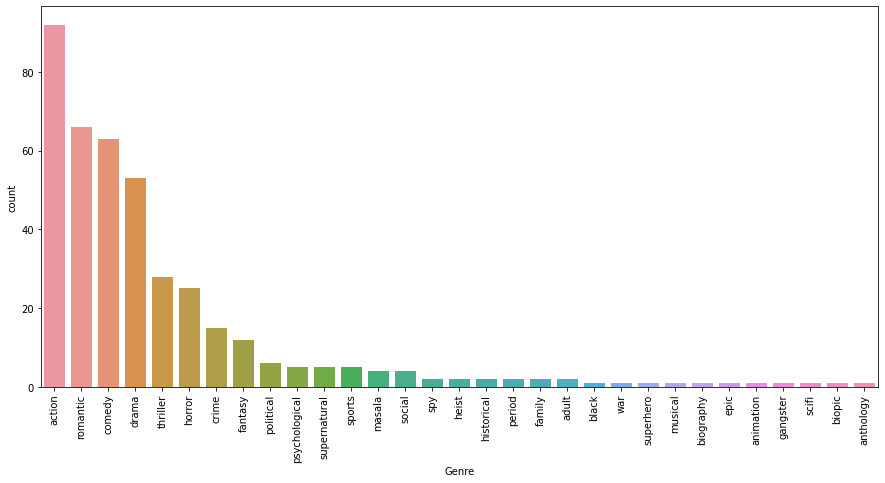

In [10]:
figd=(15,7)
fig,ax=plt.subplots(figsize=figd)
sns.countplot(x = "Genre", data=df, order = df.Genre.value_counts().index)
plt.xticks(rotation=90)
plt.show()

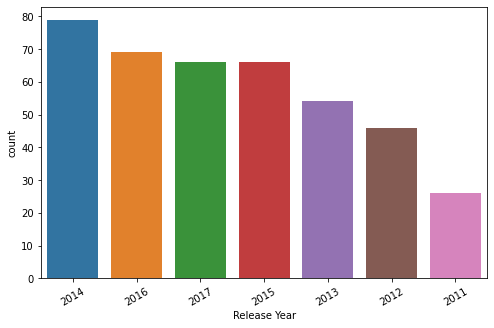

In [11]:
figd=(8,5)
fig,ax=plt.subplots(figsize=figd)
sns.countplot(x = "Release Year", data=df, order = df["Release Year"].value_counts().index)
plt.xticks(rotation=30)
plt.show()

In [12]:
df.groupby("Genre")["Rating"].max().sort_values(ascending=False)

Genre
crime            8.6
social           8.5
action           8.1
fantasy          8.1
romantic         8.1
drama            8.1
period           8.0
epic             7.9
horror           7.9
thriller         7.9
comedy           7.9
supernatural     7.9
political        7.9
musical          7.6
sports           7.3
spy              7.3
anthology        6.6
biopic           6.5
psychological    6.4
adult            6.4
historical       6.2
gangster         6.2
scifi            6.2
family           6.0
masala           5.8
heist            5.6
black            5.6
superhero        5.6
war              5.5
animation        4.8
biography        3.7
Name: Rating, dtype: float64

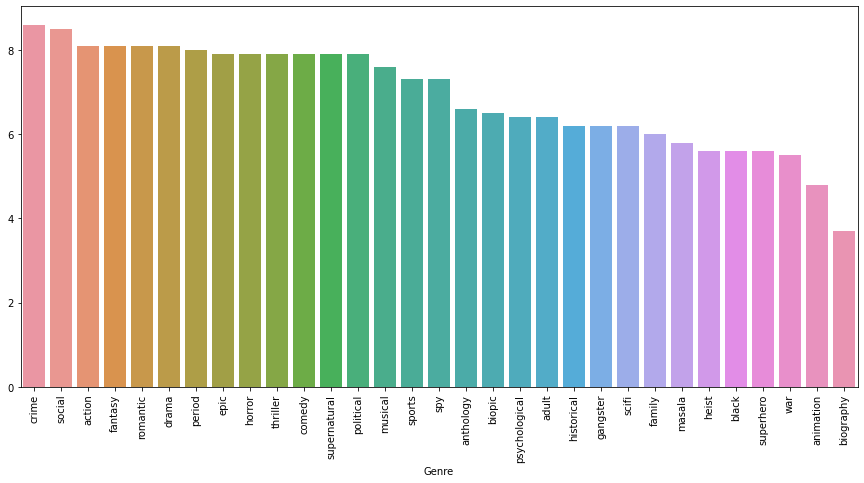

In [13]:
figd=(15,7)
fig,ax=plt.subplots(figsize=figd)
m = df.groupby("Genre")["Rating"].max().sort_values(ascending=False)
sns.barplot(x = m.index, y= m.values, data=df, ci=None)
plt.xticks(rotation=90)
plt.show()

In [14]:
nlp = spacy.load('en_core_web_sm')

In [15]:
def normalize(msg):
    
    doc = nlp(msg)
    res=[]
    
    for token in doc:
        if(token.is_stop or token.is_digit or token.is_punct or not(token.is_oov)):
            pass
        else:
            res.append(token.lemma_.lower())
    
    return " ".join(res)

In [16]:
df['Clean_plot'] = df['Plot'].apply(lambda x: normalize(x))
df.sample(5)

,Release Year,Title,Language,Director,Cast,Genre,Plot,Rating,Clean_plot
294,2016,Sawaari,Tamil,Guhan Senniappan,"Benito Franklin, Mathivanan Rajendran, Sanam Shetty",thriller,The film starts with a murder mystery. The main plot deals with how an Assistant Commissioner of Police is in the pursuit of finding the psycho killer. There is a sub plot of the film that talks about a harmless driver who aims to deliver a car on time from Chennai to Nellore but ends up getting...,4.8,film start murder mystery main plot deal assistant commissioner police pursuit find psycho killer sub plot film talk harmless driver aim deliver car time chennai nellore end get tangle \r\n sawaari road psycho thriller movie see 1950 hollywood kollywood try rajat mukherjee rgv stable try hand ro...
163,2014,Athithi,Tamil,Bharathan,"Nandha, Ananya, Nikesh Ram",thriller,"Madhiazhagan (Nandha) is a highly successful project manager at a leading property promoters firm. He's happily wedded to Vasugi (Ananya) and has a five-year-old daughter Pavi. Posh house, heftily paying job, highly appreciative and supportive boss, and a happy family - Madhi's life is a far fet...",5.6,madhiazhagan nandha highly successful project manager lead property promoter firm happily wed vasugi ananya year old daughter pavi posh house heftily pay job highly appreciative supportive boss happy family madhi life far fetched dream people era change day man request drop en route madhi vasu s...
402,2017,Kalavu Thozhirchalai,Tamil,T. Krishna Shamy,"Kathir, Kushi, Vamsi Krishna, Kalanjiyam",drama,"An idol smuggler comes to a village to steal a Shiva idol worth 600 crores. The story begins with an international criminal (Vamsi Krishna) An idol smuggler comes to a village to steal a Ancient ""Shiva"" idol worth 600 crores.Who Is arriving at a village in Tanjore with the ulterior motive of smu...",4.9,idol smuggler come village steal shiva idol worth crore story begin international criminal vamsi krishna idol smuggler come village steal ancient shiva idol worth crore arrive village tanjore ulterior motive smuggle ancient maragatha lingam idol marundeeswarar temple enter temple pretext journal...
345,2016,Maaveeran Kittu,Tamil,Suseenthiran,"Vishnu Vishal, Sri Divya, Parthiban",drama,"Set in the year 1987, the movie depicts the life of Krishnakumar alias Kittu (Vishnu), a Dalit youth whose main ambition is to become a collector. He is influenced by the ideas of Chinnarasu (R. Parthiepan), a local Dalit leader who had also sponsored his education. Chinnarasu and Kittu try to f...",4.8,set year movie depict life krishnakumar alias kittu vishnu dalit youth main ambition collector influence idea chinnarasu r. parthiepan local dalit leader sponsor education chinnarasu kittu try fight rampant caste discrimination mete upper caste people unable police court bias upper caste day kit...
214,2015,Dharani,Tamil,Guhan Sambantham,"Aari, Elango Kumaravel, Ajay Krishna, Sandra Amy, Varunika",action,The plot is set in a rural backdrop where three middle class characters running a hotel come across three different circumstances facing three important life decision that is going to change their lives forever. The film charts the path taken by them to achieve their goal and details how they tr...,5.6,plot set rural backdrop middle class character run hotel come different circumstance face important life decision go change life forever film chart path take achieve goal detail traverse nowhere.[3


In [17]:
def freq_words(x, terms = 30): 
  all_words = str(x).split() 
  fdist = nltk.FreqDist(all_words) 
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  d = words_df.nlargest(columns="count", n = terms) 
  
  # visualize words and frequencies
  plt.figure(figsize=(12,15)) 
  ax = sns.barplot(data=d, x= "count", y = "word") 
  ax.set(ylabel = 'Word') 
  plt.show()

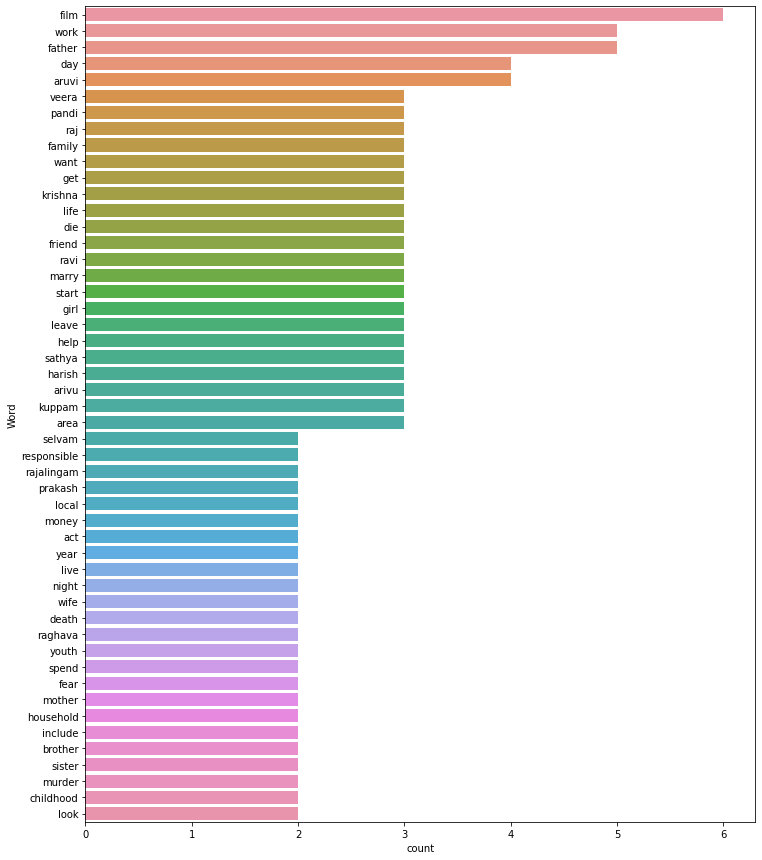

In [18]:
# print 50 most frequent words 
freq_words(df['Clean_plot'], 50)

In [19]:
le = LabelEncoder()
df["Genre"] = le.fit_transform(df["Genre"])
df.sample(5)

,Release Year,Title,Language,Director,Cast,Genre,Plot,Rating,Clean_plot
258,2015,Orange Mittai,Tamil,Biju Viswanath,"Vijay Sethupathi, Ramesh Thilak, Aashritha",7,"Satya (Ramesh Thilak) works as a paramedic in an ambulance emergency service. On the same day of his father's death anniversary, Sathya receives a call to pick up an old man who claims to be critically ill. Sathya, along with ambulance driver, rushes to the old man's house in an ambulance and he...",5.5,satya ramesh thilak work paramedic ambulance emergency service day father death anniversary sathya receive pick old man claim critically ill sathya ambulance driver rush old man house ambulance help kailasam vijay sethupathi board vehicle process learn old man fight life claim early heart patien...
69,2012,Thuppakki,Tamil,A. R. Murugadoss,"Vijay, Kajal Aggarwal, Vidyut Jamwal, Jayaram",0,"Jagadish, a captain in the Indian Army, returns to Mumbai from Kashmir. On his arrival, his parents and younger sisters force him to see Nisha, who they choose for him to be married to. At the bride-viewing ceremony, Jagadish makes up excuses to avoid marrying her, which includes commenting abou...",7.9,jagadish captain indian army return mumbai kashmir arrival parent young sister force nisha choose married bride view ceremony jagadish make excuse avoid marry include comment old fashioned contrary nisha college level boxer completely modern outlook jagadish realise propose initial refusal recip...
308,2016,Idhu Namma Aalu,Tamil,Pandiraj,"Silambarasan, Nayanthara, Andrea Jeremiah",22,"Shiva (Silambarasan) is an IT engineer with Vaasu (Soori) as his driver and his colleague. He visits Myla (Nayanthara) for a marriage proposal and instantly likes her. Myla wishes to speak to him privately and asks him about Priya (Andrea Jeremiah), his ex-girlfriend. Shiva accepts his old love ...",6.6,shiva silambarasan engineer vaasu soori driver colleague visit myla nayanthara marriage proposal instantly like myla wish speak privately ask priya andrea jeremiah ex girlfriend shiva accept old love leave house think marriage will happen myla accept marriage proposal later start speak phone shi...
54,2012,Attakathi,Tamil,Pa. Ranjit,"Dinesh, Nandita, Iyshwarya Rajesh",22,"Dinakaran (Dinesh) referred as Atta among his friends is a regular semi-urban teenager growing up in a small village in the outskirts of Chennai. He did well in his school exams, but failed his English paper. Rather than studying for the second attempt, he wastes time looking for a girlfriend si...",5.5,dinakaran dinesh refer atta friend regular semi urban teenager grow small village outskirt chennai school exam fail english paper study second attempt waste time look girlfriend pact good friend fall love marry \r\n dinakaran fall girl meet bus stop name poornima nandita appear like smile accept...
306,2016,Pencil,Tamil,Mani Nagaraj,"G. V. Prakash Kumar, Sri Divya, Shariq Hassan",29,"Shiva (G. V. Prakash Kumar) is the best student at his school. His rival, Nithin (Shariq Hassan), the son of a leading film star and a spoiled brat, takes any and every opportunity to knock him down both verbally and physically, and the two are known enemies amongst the other students. One day, ...",5.4,shiva g. v. prakash kumar good student school rival nithin shariq hassan son lead film star spoiled brat take opportunity knock verbally physically know enemy student day nithin burn shiva thesis shiva find assault nithin school school management intervene later shiva return class fight nithin f...


In [20]:
tfidf_vectorizer = TfidfVectorizer()
def feature_extraction(msg):
    
    mat = pd.DataFrame(tfidf_vectorizer.fit_transform(msg).toarray(),columns=tfidf_vectorizer.get_feature_names(),index=None)
    return mat

In [21]:
train_x,train_y, test_x,test_y = train_test_split(feature_extraction(df['Clean_plot']),df['Genre'], test_size=0.3)

In [22]:
train_x.head()

,00,000,00pm,01,03,10,100,100th,107,10nth,...,zakir,zameen,zamindar,zaveri,zealand,zen,zero,zip,zonal,zoomed
267,0.0,0.0,0.0,0.035485,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
159,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
284,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
166,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
test_x.head()

275     0
164     9
293    22
33     12
171    22
Name: Genre, dtype: int32

In [24]:
clfs = {
    'mnb': MultinomialNB(),
    'gnb': GaussianNB(),
    'mlp1': MLPClassifier(),
    'mlp2': MLPClassifier(hidden_layer_sizes=[100, 100]),
    'ada': AdaBoostClassifier(),
    'dtc': DecisionTreeClassifier(),
    'rfc': RandomForestClassifier(),
    'gbc': GradientBoostingClassifier(),
    'lr': LogisticRegression()
}

In [25]:
f1_scores = dict()
for clf_name in clfs:
    clf = clfs[clf_name]
    clf.fit(train_x, test_x)
    y_pred = clf.predict(train_y)
    f1_scores[clf_name] = accuracy_score(y_pred, test_y)
    print(clf,":", f1_scores[clf_name])

MultinomialNB() : 0.19672131147540983
GaussianNB() : 0.18032786885245902


C:\Users\nithi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier() : 0.2540983606557377
MLPClassifier(hidden_layer_sizes=[100, 100]) : 0.29508196721311475
AdaBoostClassifier() : 0.23770491803278687
DecisionTreeClassifier() : 0.1885245901639344
RandomForestClassifier() : 0.2786885245901639
GradientBoostingClassifier() : 0.28688524590163933
LogisticRegression() : 0.23770491803278687


In [26]:
clf = MLPClassifier(solver = 'lbfgs', alpha=0.4,hidden_layer_sizes=[100, 100])
clf.fit(train_x, test_x)
y_pred = clf.predict(train_y)
print(confusion_matrix(y_pred, test_y))

[[15  0  1  0 11  4 16  0  2  1  0  1  1  9  1  2  1  6]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  5  0  0  0  1  0  0  0  0  4  1  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  1  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  1  7  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 5  0  0  1  2  0  3  0  0  1  1  0  0  4  0  1  0  3]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0

C:\Users\nithi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


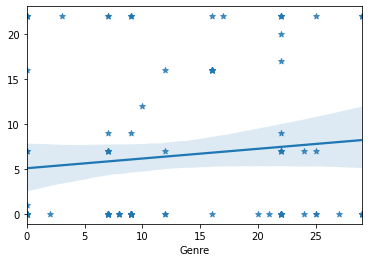

In [27]:
sns.regplot(x=test_y,y=y_pred,marker="*")